In [1]:
import torch
print(torch.__version__)

2.5.1+cu121


In [2]:
! pip uninstall torch

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.5.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.5.1+cu121


In [3]:
! pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 875.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17

In [1]:
! pip install torch-scatter==2.1.1 torch-sparse==0.6.15 torch-cluster==1.6.0
! pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.1-cp310-cp310-linux_x86_64.whl size=3666883 sha256=ced97fb17f18dfd4a64f0a864ed5166b389d35174dee46aa071426b5474d0ecb
  Stored in directory: /root/.cache/pip/wheels/ef/67/58/6566a3b61c6ec0f2ca0c2c324cd035ef2955601f0fb3197d5f
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for torch-sparse
  Running setup.py clean for torch-sparse
  Created wheel for torch-c

In [2]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.5 MB/s eta 0:00:00


In [48]:
import os
import sys

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, RGCNConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import SaltRemover

#from src.utils.constants import HOME_DIR, DATA_DIR

In [49]:
# Function to calculate molecular weight from a SMILES string
def calculate_molecular_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolWt(mol)  # Calculate the molecular weight (g/mol)
    else:
        return None  # Return None if the SMILES string is invalid

In [102]:
data1 = pd.read_csv('clean_data_2.csv')
print(data1['Canonical_SMILES'].dtype)

object


In [103]:
data1['Canonical_SMILES'] = data1['Canonical_SMILES'].astype(str)
range(len(data1))

range(0, 6625)

In [104]:
data1 = data1[['Canonical_SMILES', 'LD50_mgkg']]
data1

,Canonical_SMILES,LD50_mgkg
0,CCCP(=O)(OC)SC,25.0
1,O=c1[nH]c(=O)n(C2CCCO2)cc1F,930.0
2,CN(CCO)c1ccc(N=Nc2c(Cl)cc([N+](=O)[O-])cc2Cl)cc1,2820.0
3,Cc1ccc(S(=O)(=O)NC(=O)N[C@H]2[C@H]3CC[C@@](C)(...,18000.0
4,BrC=CBr,62.0
...,...,...
6620,COc1ccc(CCNCC(O)COc2ccc(OCC(C)=O)c3c2CCC(O)=N3...,1260.0
6621,CCC1N=C(O)c2ccccc2O1,1310.0
6622,Cc1ncc2c(c1O)CSSC2.Cl,1110.0
6623,CC(=O)OC(C(Cl)(Cl)Cl)P(=O)(Oc1ccccc1)Oc1ccccc1,3280.0


In [105]:
data1 = data1[data1['Canonical_SMILES'].notna()]
data1['Molecular_Weight'] = data1['Canonical_SMILES'].apply(calculate_molecular_weight)
data1['LD50_molkg'] = data1['LD50_mgkg'] / (data1['Molecular_Weight'] * 1000)
data1

,Canonical_SMILES,LD50_mgkg,Molecular_Weight,LD50_molkg
0,CCCP(=O)(OC)SC,25.0,168.198,0.000149
1,O=c1[nH]c(=O)n(C2CCCO2)cc1F,930.0,200.169,0.004646
2,CN(CCO)c1ccc(N=Nc2c(Cl)cc([N+](=O)[O-])cc2Cl)cc1,2820.0,369.208,0.007638
3,Cc1ccc(S(=O)(=O)NC(=O)N[C@H]2[C@H]3CC[C@@](C)(...,18000.0,366.483,0.049116
4,BrC=CBr,62.0,185.846,0.000334
...,...,...,...,...
6620,COc1ccc(CCNCC(O)COc2ccc(OCC(C)=O)c3c2CCC(O)=N3...,1260.0,562.572,0.002240
6621,CCC1N=C(O)c2ccccc2O1,1310.0,177.203,0.007393
6622,Cc1ncc2c(c1O)CSSC2.Cl,1110.0,235.761,0.004708
6623,CC(=O)OC(C(Cl)(Cl)Cl)P(=O)(Oc1ccccc1)Oc1ccccc1,3280.0,423.616,0.007743


In [106]:
data = pd.read_csv('clean_data.csv')
data['Molecular_Weight'] = data['Canonical_SMILES'].apply(calculate_molecular_weight)
data['LD50_molkg'] = data['LD50_mgkg'] / (data['Molecular_Weight'] * 1000)
data

,Canonical_SMILES,LD50_mgkg,Molecular_Weight,LD50_molkg
0,O=[N+]([O-])c1ccc(Cl)cc1,460.00,157.556,0.002920
1,Nc1ccc([N+](=O)[O-])cc1,750.00,138.126,0.005430
2,O=[N+]([O-])c1ccc(O)cc1,170.00,139.110,0.001222
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.00,171.583,0.010543
4,COc1ccc([N+](=O)[O-])cc1,2300.00,153.137,0.015019
...,...,...,...,...
5301,CCO[PH](=S)OCC,200.00,154.171,0.001297
5302,CCCSP(C)SCCC,2.24,196.321,0.000011
5303,C=CC(=O)OCC(C)O,250.00,130.143,0.001921
5304,C[N+](C)(C)CCCl,600.00,122.619,0.004893


In [107]:
# Concatenate the DataFrames row-wise (ignoring the index)
full_data = pd.concat([data, data1], ignore_index=True)

# Remove duplicate rows
full_data = full_data.drop_duplicates()

# Filter out rows where the SMILES string contains a '*'
data_cleaned = full_data[~full_data['Canonical_SMILES'].str.contains('\*', na=False)]

# Display the resulting concatenated DataFrame
data_cleaned.index = range(len(data_cleaned))
data_cleaned

,Canonical_SMILES,LD50_mgkg,Molecular_Weight,LD50_molkg
0,O=[N+]([O-])c1ccc(Cl)cc1,460.0,157.556,0.002920
1,Nc1ccc([N+](=O)[O-])cc1,750.0,138.126,0.005430
2,O=[N+]([O-])c1ccc(O)cc1,170.0,139.110,0.001222
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.0,171.583,0.010543
4,COc1ccc([N+](=O)[O-])cc1,2300.0,153.137,0.015019
...,...,...,...,...
8349,COc1ccc(CCNCC(O)COc2ccc(OCC(C)=O)c3c2CCC(O)=N3...,1260.0,562.572,0.002240
8350,CCC1N=C(O)c2ccccc2O1,1310.0,177.203,0.007393
8351,Cc1ncc2c(c1O)CSSC2.Cl,1110.0,235.761,0.004708
8352,CC(=O)OC(C(Cl)(Cl)Cl)P(=O)(Oc1ccccc1)Oc1ccccc1,3280.0,423.616,0.007743


In [108]:
def remove_salt_ions_from_smiles(smiles):
    # Convert SMILES string to molecule object
    mol = Chem.MolFromSmiles(smiles)
    remover = SaltRemover.SaltRemover()
    if mol:
        # Remove salts using the SaltRemover function directly
        mol_no_salts = remover.StripMol(mol)

        # Convert the cleaned molecule back to SMILES and return it
        return Chem.MolToSmiles(mol_no_salts)
    else:
        return None  # In case of invalid SMILES string

data_cleaned.loc[:, 'SMILES_no_salts'] = data_cleaned['Canonical_SMILES'].apply(remove_salt_ions_from_smiles)
data_cleaned = data_cleaned.dropna()

data_cleaned

KeyboardInterrupt: 

In [109]:
x = data_cleaned['Canonical_SMILES'] #run desalted
y = data_cleaned['LD50_molkg'].to_numpy() #changed mol to mg from pictured runs
y = np.log(y)
y = list(y)

print('length of x:', len(x))
print('sample of x:', x[0])
print('====================')

print('length of y:', len(y))
print('sample of y:', y[0])

length of x: 8354
sample of x: O=[N+]([O-])c1ccc(Cl)cc1
length of y: 8354
sample of y: -5.836309740125341


In [110]:
def smiles_to_graph(smiles_list, labels):
    """
    Converts a list of SMILES strings into a list of PyTorch Geometric Data objects,
    including bond types as edge attributes.
    """

    def get_atom_hash(atomic_number):
        """
        A helper function to quickly encode atomic number into a one-hot vector
        """
        atomic_number_list = [1, 3, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 19, 20, 25, 26, 27, 28, 29, 30, 34, 35, 47, 48, 51, 53, 55, 56] # Atomic numbers of atoms in the dataset (length 13)
        if atomic_number in atomic_number_list:
            return atomic_number_list.index(atomic_number)
        else:
            raise ValueError(f'Atomic number {atomic_number} not supported')

    def get_bond_type(bond):
        """
        Encodes bond type as an integer:
        - Single: 0
        - Double: 1
        - Triple: 2
        - Aromatic: 3
        """
        bond_type = bond.GetBondType()
        if bond_type == Chem.rdchem.BondType.SINGLE:
            return 0
        elif bond_type == Chem.rdchem.BondType.DOUBLE:
            return 1
        elif bond_type == Chem.rdchem.BondType.TRIPLE:
            return 2
        elif bond_type == Chem.rdchem.BondType.AROMATIC:
            return 3
        else:
            raise ValueError(f'Unsupported bond type: {bond_type}')

    data_list = []
    for smiles, label in zip(smiles_list, labels):
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)  # Add explicit hydrogens to the molecule
        if mol is None:
            raise ValueError(f'Could not parse SMILES string: {smiles}')

        # Node features: One-hot vector depending on the atomic number (the position of the 1 in the vector)
        node_features = []
        for atom in mol.GetAtoms():
            atomic_number = atom.GetAtomicNum()
            if atomic_number == 0:
              print(f"Warning: Atom with atomic number 0 found in molecule: {smiles}")
              continue  # Skip this atom if the atomic number is 0
            one_hot = [0] * len([1, 3, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 19, 20, 25, 26, 27, 28, 29, 30, 34, 35, 47, 48, 51, 53, 55, 56]) # Length of the atomic number list
            one_hot[get_atom_hash(atomic_number)] = 1
            node_features.append(one_hot)

        x = torch.tensor(node_features, dtype=torch.float)

        # Edge indices and edge types (bond types)
        edge_indices = []
        edge_types = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()

            # Add edges (both directions for undirected graph)
            edge_indices.append((i, j))
            edge_indices.append((j, i))

            # Add bond type for both directions
            bond_type = get_bond_type(bond)
            edge_types.append(bond_type)
            edge_types.append(bond_type)

        edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
        edge_type = torch.tensor(edge_types, dtype=torch.long)

        # Target value (LD50 label)
        y = torch.tensor([label], dtype=torch.float)

        # Create PyTorch Geometric Data object
        data_cleaned = Data(x=x, edge_index=edge_index, edge_type=edge_type, y=y)
        data_list.append(data_cleaned)

    return data_list

In [111]:
# Convert to PyTorch Geometric Data objects
data_list = smiles_to_graph(x, y)

# Create DataLoader for batching (test, train, val split)
test_size = int(len(data_list) * 0.1)
val_size = int(len(data_list) * 0.1)
train_size = len(data_list) - test_size - val_size

# Set random seed for reproducibility
torch.manual_seed(0)
train_data, val_data, test_data = torch.utils.data.random_split(data_list, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [112]:
class GCNRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.conv1 = GCNConv(input_dim, 128)  # First GCN layer
        self.conv2 = GCNConv(128, 64)         # Second GCN layer
        self.conv3 = GCNConv(64, 64)         # Third GCN layer
        self.conv4 = GCNConv(64, 32)         # Fourth GCN layer
        self.fc = nn.Linear(32, 1)          # Fully connected layer for regression
        self.dropout = 0.5                 # Dropout rate

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # Apply GCN layers with ReLU activation
        # Apply dropout at all layers except the last one

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Global mean pooling to aggregate node features for each graph
        x = global_mean_pool(x, batch)

        # Fully connected layer for regression output
        out = self.fc(x)
        return out

class RGCNRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, num_edge_types):
        super().__init__()
        self.conv1 = RGCNConv(input_dim, 1024, num_relations=num_edge_types)
        self.conv2 = RGCNConv(1024, 1024, num_relations=num_edge_types)
        self.conv3 = RGCNConv(1024, 712, num_relations=num_edge_types)
        self.fc1 = torch.nn.Linear(712, 64)
        self.fc2 = torch.nn.Linear(64, 1)
        self.dropout = 0.2

    def forward(self, data, return_embeds=False):
        x, edge_index, edge_type, batch = data.x, data.edge_index, data.edge_type, data.batch

        # Apply RGCN layers with ReLU activation
        x = self.conv1(x, edge_index=edge_index, edge_type=edge_type)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.conv2(x, edge_index=edge_index, edge_type=edge_type)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.conv3(x, edge_index=edge_index, edge_type=edge_type)
        x = F.relu(x)
        # x = F.dropout(x, p=self.dropout, training=self.training)

        # Global mean pooling to aggregate node features for each graph
        x = global_mean_pool(x, batch)

        if return_embeds: # Return node embeddings early if specified
            return x

        # Fully connected layer for regression output
        x = self.fc1(x)
        out = self.fc2(x)

        return out

Epoch 1, Train Loss: 8.5831, Val Loss: 4.1377
Epoch 2, Train Loss: 3.8377, Val Loss: 3.5984
Epoch 3, Train Loss: 3.5810, Val Loss: 3.2646
Epoch 4, Train Loss: 3.4178, Val Loss: 3.1872
Epoch 5, Train Loss: 3.3207, Val Loss: 3.0699
Epoch 6, Train Loss: 3.2834, Val Loss: 2.8737
Epoch 7, Train Loss: 3.2294, Val Loss: 2.9963
Epoch 8, Train Loss: 3.1738, Val Loss: 2.8606
Epoch 9, Train Loss: 3.0872, Val Loss: 3.0359
Epoch 10, Train Loss: 3.0933, Val Loss: 2.7666
Epoch 11, Train Loss: 3.0588, Val Loss: 2.7008
Epoch 12, Train Loss: 2.9830, Val Loss: 2.7636
Epoch 13, Train Loss: 2.9797, Val Loss: 2.6391
Epoch 14, Train Loss: 2.9257, Val Loss: 2.7225
Epoch 15, Train Loss: 2.8816, Val Loss: 2.6211
Epoch 16, Train Loss: 2.9082, Val Loss: 2.6547
Epoch 17, Train Loss: 2.8627, Val Loss: 2.6340
Epoch 18, Train Loss: 2.8115, Val Loss: 2.5638
Epoch 19, Train Loss: 2.7834, Val Loss: 2.6505
Epoch 20, Train Loss: 2.7703, Val Loss: 2.6896
Epoch 21, Train Loss: 2.7592, Val Loss: 2.7172
Epoch 22, Train Loss: 

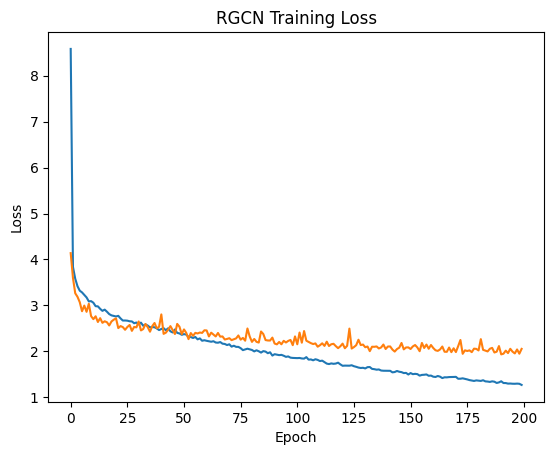

In [113]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RGCNRegressionModel(input_dim=28, num_edge_types=4).to(device)  # Adjust input_dim based on node features
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_losses = []
val_losses = []

# Training loop with eval on validation set
# Train with R2 regularization
for epoch in range(200):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)

        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out.squeeze(), batch.y)
        loss.backward()

        optimizer.step()
        total_loss += loss.item()

    total_loss /= len(train_loader)
    train_losses.append(total_loss)

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for batch in val_loader:
            batch = batch.to(device)
            out = model(batch)
            loss = criterion(out.squeeze(), batch.y)
            val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {total_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RGCN Training Loss')
plt.show()

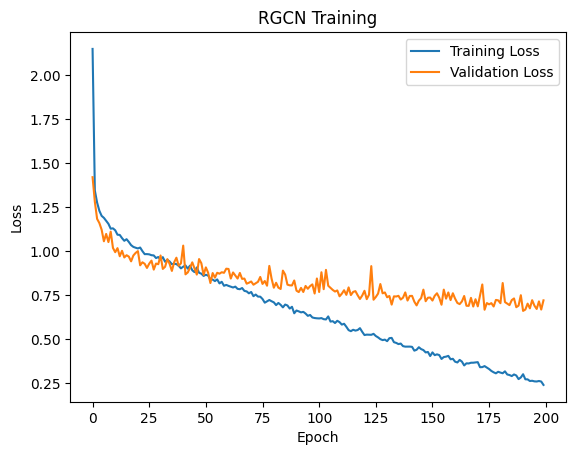

In [115]:
# log plot of loss
plt.plot(np.log(train_losses), label='Training Loss')
plt.plot(np.log(val_losses), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RGCN Training')
plt.legend()
plt.show()

In [116]:
# Validation loop
model.eval()
total_loss = 0

y_true = np.array([])
y_pred = np.array([])

with torch.no_grad():
    for batch in val_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = criterion(out.squeeze(), batch.y)
        total_loss += loss.item()

        y_true = np.concatenate([y_true, batch.y.cpu().numpy()])
        y_pred = np.concatenate([y_pred, out.cpu().numpy().squeeze()])


print(f"Validation Loss: {total_loss:.4f}")

Validation Loss: 28.7522


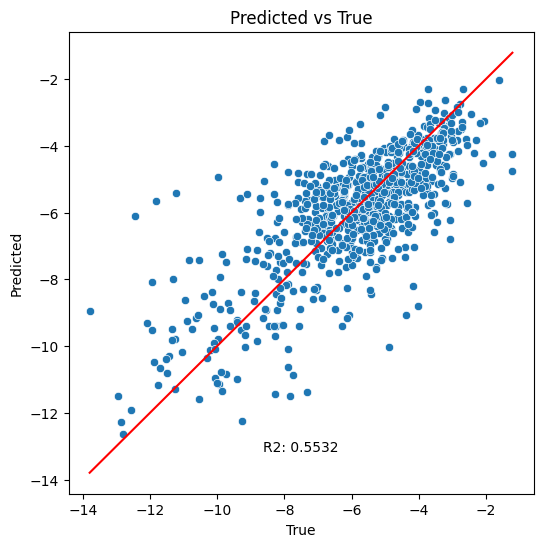

In [117]:
# Plot predicted vs true values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred)
# Add a line
x_plot = np.linspace(min(y_true), max(y_true), 100)
plt.plot(x_plot, x_plot, color='r')


# Calculate and display R2 score on graph
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
plt.text(0.5, 0.1, f'R2: {r2:.4f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Predicted vs True')
plt.show()